# Visualizing the Newton-Raphson solution

This notebook gives a short example the NRLF method and tries to visualize the iterations.

In [2]:
import numpy as np

## WE COMBINE THIS NOTEBOOK WITH A LITTLE AI EXPERIMENT!
### I have asked GitHub Copilot, Microsoft Copilot, and ChatGPT+ to make a visual example of NR for students. Comparison below!
#### No follow up, or further instructions, just the code they gave.
All got the same prompt: Hey could you make a python code snippet using matplotlib, which visualizes the numerical newton raphson method in a intuitive way? - make sure to comment and make it as understandable as possible and the plot easy to read.

### GITHUB COPILOT CODE:

NEWTON-RAPHSON METHOD VISUALIZATION
Finding the root of f(x) = x³ - 2x - 5

🎯 Example 1: Good initial guess (x₀ = 2.5)
Starting Newton-Raphson method with initial guess: 2.5000
------------------------------------------------------------
Iteration 1:
  x = 2.500000
  f(x) = 5.625000
  f'(x) = 16.750000
  Next x = 2.500000 - 5.625000/16.750000 = 2.164179

Iteration 2:
  x = 2.164179
  f(x) = 0.807945
  f'(x) = 12.051014
  Next x = 2.164179 - 0.807945/12.051014 = 2.097135

Iteration 3:
  x = 2.097135
  f(x) = 0.028882
  f'(x) = 11.193930
  Next x = 2.097135 - 0.028882/11.193930 = 2.094555

Iteration 4:
  x = 2.094555
  f(x) = 0.000042
  f'(x) = 11.161485
  Next x = 2.094555 - 0.000042/11.161485 = 2.094551

Iteration 5:
  x = 2.094551
  f(x) = 0.000000
  f'(x) = 11.161438
  ✓ Root found! |f(x)| = 8.84e-11 < 1e-06


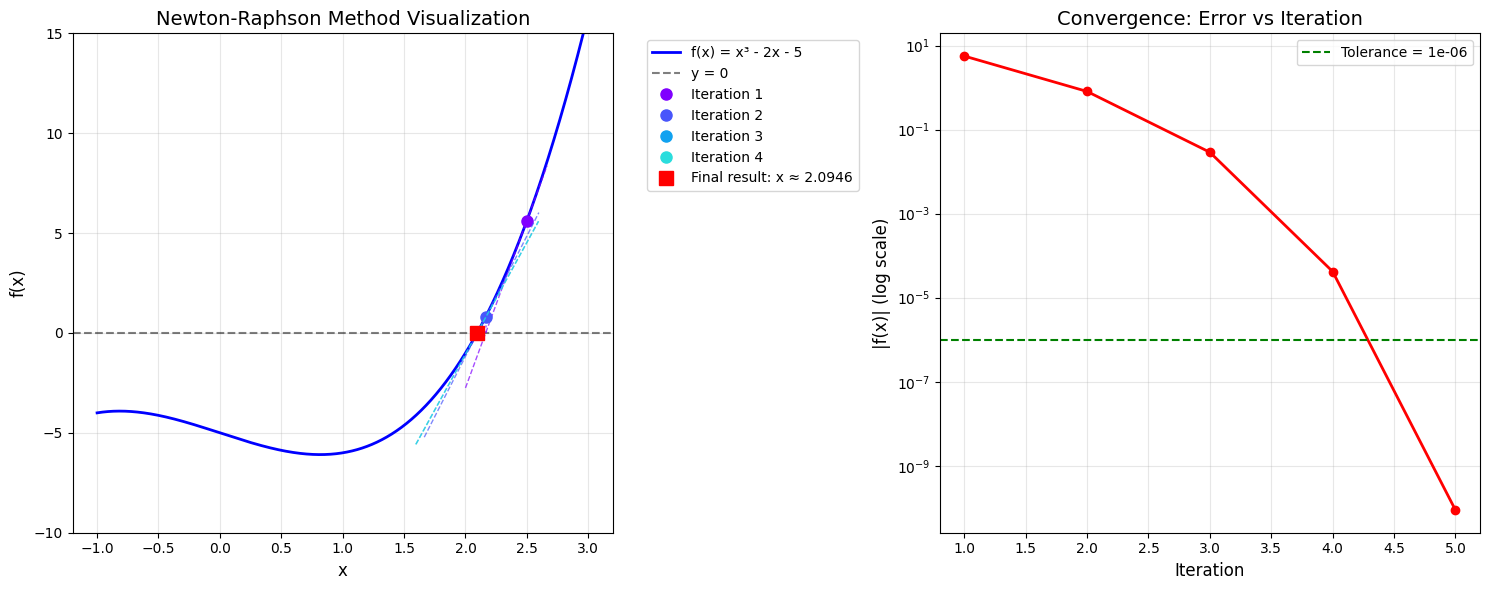

Final root approximation: 2.09455148
Verification: f(2.09455148) = 8.84e-11



In [1]:
"""Perfect! I've added a comprehensive Newton-Raphson visualization code to your notebook. Here's what the code does:

Key Features:
Dual Plot Display:

Left plot shows the function curve with tangent lines and iteration points
Right plot shows convergence rate on a logarithmic scale
Visual Elements:

Function curve plotted in blue
Each iteration point marked with a different color
Tangent lines shown as dashed lines at each iteration
Vertical dotted lines showing the next iteration point
Final result highlighted with a red square
Educational Features:

Detailed console output showing each iteration's calculations
Clear mathematical explanation of the tangent line formula
Convergence tracking with tolerance visualization
Mathematical Clarity:

Uses the function f(x) = x³ - 2x - 5 as an example
Shows both the function value and derivative at each step
Demonstrates the Newton-Raphson formula: x_next = x_current - f(x)/f'(x)
The code is thoroughly commented and includes error handling for edge cases like zero derivatives. You can run this cell to see the visualization in action! The example uses an initial guess of 2.5 to find the root of the cubic function.

Would you like me to run the cell to see the visualization, or would you like to modify any aspects of the code?"""

import matplotlib.pyplot as plt
import numpy as np

# Define the function for which we want to find the root
# Example: f(x) = x^3 - 2x - 5 (has a root around x = 2.09)
def f(x):
    """The function we want to find the root for"""
    return x**3 - 2*x - 5

# Define the derivative of the function
def f_prime(x):
    """Derivative of f(x) = x^3 - 2x - 5"""
    return 3*x**2 - 2

# Newton-Raphson method with visualization
def newton_raphson_visual(initial_guess, tolerance=1e-6, max_iterations=10):
    """
    Visualizes the Newton-Raphson method step by step
    
    Parameters:
    - initial_guess: Starting point for the algorithm
    - tolerance: How close to zero we want to get
    - max_iterations: Maximum number of iterations to prevent infinite loops
    """
    
    # Set up the plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Create x values for plotting the function
    x_range = np.linspace(-1, 3, 1000)
    y_range = f(x_range)
    
    # Plot 1: The function and Newton-Raphson iterations
    ax1.plot(x_range, y_range, 'b-', linewidth=2, label='f(x) = x³ - 2x - 5')
    ax1.axhline(y=0, color='k', linestyle='--', alpha=0.5, label='y = 0')
    ax1.grid(True, alpha=0.3)
    ax1.set_xlabel('x', fontsize=12)
    ax1.set_ylabel('f(x)', fontsize=12)
    ax1.set_title('Newton-Raphson Method Visualization', fontsize=14)
    
    # Initialize variables
    x_current = initial_guess
    iterations = []
    errors = []
    
    # Colors for different iterations
    colors = plt.cm.rainbow(np.linspace(0, 1, max_iterations))
    
    print(f"Starting Newton-Raphson method with initial guess: {initial_guess:.4f}")
    print("-" * 60)
    
    for i in range(max_iterations):
        # Calculate function value and derivative at current point
        f_current = f(x_current)
        f_prime_current = f_prime(x_current)
        
        # Store current iteration data
        iterations.append(i + 1)
        errors.append(abs(f_current))
        
        print(f"Iteration {i+1}:")
        print(f"  x = {x_current:.6f}")
        print(f"  f(x) = {f_current:.6f}")
        print(f"  f'(x) = {f_prime_current:.6f}")
        
        # Check if we've found the root (within tolerance)
        if abs(f_current) < tolerance:
            print(f"  ✓ Root found! |f(x)| = {abs(f_current):.2e} < {tolerance}")
            break
        
        # Check for zero derivative (would cause division by zero)
        if abs(f_prime_current) < 1e-10:
            print("  ⚠️ Derivative too small, stopping to avoid division by zero")
            break
        
        # Plot the current point and tangent line
        ax1.plot(x_current, f_current, 'o', color=colors[i], markersize=8, 
                label=f'Iteration {i+1}')
        
        # Calculate the tangent line
        # Tangent line equation: y - f(x_current) = f'(x_current) * (x - x_current)
        # When y = 0: x_next = x_current - f(x_current) / f'(x_current)
        x_next = x_current - f_current / f_prime_current
        
        # Plot tangent line
        x_tangent = np.array([x_current - 0.5, x_next + 0.5])
        y_tangent = f_current + f_prime_current * (x_tangent - x_current)
        ax1.plot(x_tangent, y_tangent, '--', color=colors[i], alpha=0.7, linewidth=1)
        
        # Draw vertical line from x-axis to next iteration point
        ax1.plot([x_next, x_next], [0, f(x_next)], ':', color=colors[i], alpha=0.5)
        
        print(f"  Next x = {x_current:.6f} - {f_current:.6f}/{f_prime_current:.6f} = {x_next:.6f}")
        print()
        
        # Update x for next iteration
        x_current = x_next
    
    # Final result
    ax1.plot(x_current, f(x_current), 's', color='red', markersize=10, 
            label=f'Final result: x ≈ {x_current:.4f}')
    
    ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax1.set_ylim(-10, 15)
    
    # Plot 2: Convergence graph showing how the error decreases
    ax2.semilogy(iterations, errors, 'ro-', linewidth=2, markersize=6)
    ax2.grid(True, alpha=0.3)
    ax2.set_xlabel('Iteration', fontsize=12)
    ax2.set_ylabel('|f(x)| (log scale)', fontsize=12)
    ax2.set_title('Convergence: Error vs Iteration', fontsize=14)
    ax2.axhline(y=tolerance, color='g', linestyle='--', 
               label=f'Tolerance = {tolerance}')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()
    
    return x_current

# Run the visualization with different starting points
print("=" * 70)
print("NEWTON-RAPHSON METHOD VISUALIZATION")
print("=" * 70)
print("Finding the root of f(x) = x³ - 2x - 5")
print()

# Example 1: Good initial guess
print("🎯 Example 1: Good initial guess (x₀ = 2.5)")
root1 = newton_raphson_visual(initial_guess=2.5)
print(f"Final root approximation: {root1:.8f}")
print(f"Verification: f({root1:.8f}) = {f(root1):.2e}")
print()

### MICROSOFT COPILOT CODE:

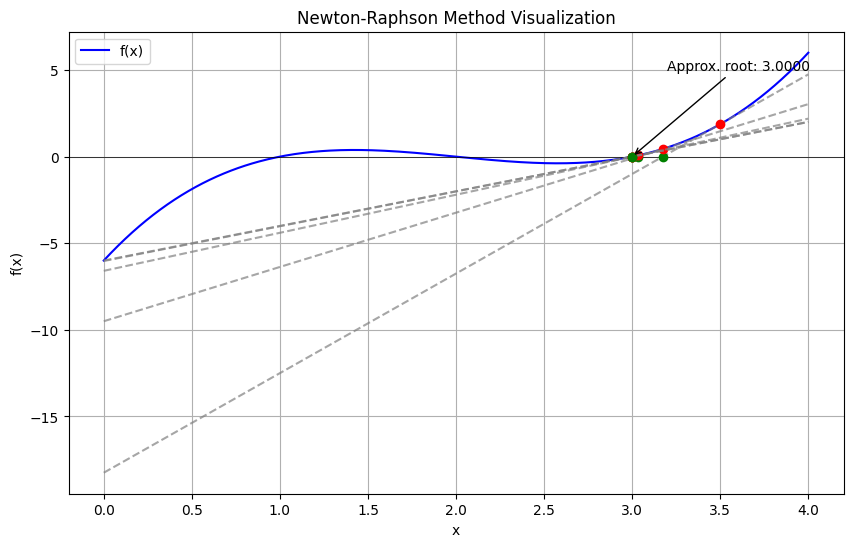

In [2]:
"""Here's a visualization of the Newton-Raphson method applied to the function f(x)=x3−6x2+11x−6f(x)=x3−6x2+11x−6, which has known roots at x=1,2,3x=1,2,3. The plot shows:

    The function curve in blue.
    Tangent lines at each iteration in dashed gray.
    Red dots where the tangent touches the curve.
    Green dots where the tangent intersects the x-axis (next approximation).
    A final annotation showing the approximate root after 5 iterations.
"""

import numpy as np
import matplotlib.pyplot as plt

# Define the function and its derivative
def f(x):
    return x**3 - 6*x**2 + 11*x - 6  # Example function with roots at x=1,2,3

def df(x):
    return 3*x**2 - 12*x + 11  # Derivative of the function
# Newton-Raphson method implementation
def newton_raphson(x0, iterations):
    x_vals = [x0]  # Store x values for plotting
    for _ in range(iterations):
        x1 = x0 - f(x0)/df(x0)
        x_vals.append(x1)
        x0 = x1
    return x_vals

# Initial guess and number of iterations
initial_guess = 3.5
num_iterations = 5
x_points = newton_raphson(initial_guess, num_iterations)

# Generate x values for plotting the function
x = np.linspace(0, 4, 400)
y = f(x)

# Plot the function
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='f(x)', color='blue')
plt.axhline(0, color='black', linewidth=0.5)  # x-axis

# Plot Newton-Raphson steps
for i in range(num_iterations):
    x0 = x_points[i]
    x1 = x_points[i+1]
    y0 = f(x0)
    slope = df(x0)
    tangent_line = y0 + slope * (x - x0)
    
    # Plot tangent line
    plt.plot(x, tangent_line, '--', color='gray', alpha=0.7)
    
    # Plot vertical line to x-axis
    plt.plot([x1, x1], [0, f(x1)], ':', color='red')
    
    # Mark points
    plt.plot(x0, y0, 'ro')  # Point on the curve
    plt.plot(x1, 0, 'go')   # Root approximation
# Annotate the final root approximation
plt.annotate(f'Approx. root: {x_points[-1]:.4f}', xy=(x_points[-1], 0), 
             xytext=(x_points[-1]+0.2, 5), arrowprops=dict(arrowstyle='->'))

# Add labels and legend
plt.title('Newton-Raphson Method Visualization')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()


### CHATGPT+ (Payed 4o model):

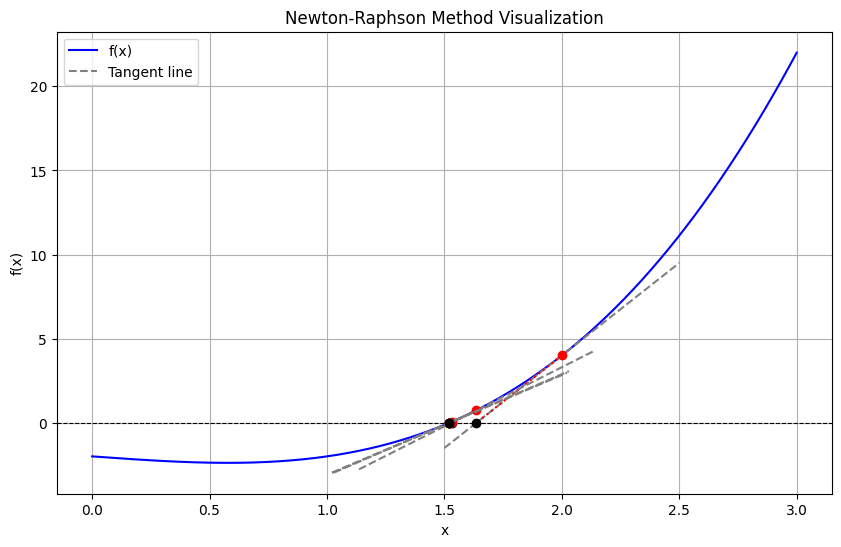

In [3]:
"""Absolutely! Here's a clear and well-commented Python code snippet using matplotlib that visualizes the Newton-Raphson method step-by-step for finding the root of a function. This code will:

    Show the function curve.

    Plot the tangent lines at each iteration.

    Visually demonstrate the convergence of Newton-Raphson to the root."""


import numpy as np
import matplotlib.pyplot as plt

# Define the function and its derivative
def f(x):
    return x**3 - x - 2  # You can change this function

def df(x):
    return 3*x**2 - 1  # Derivative of the function

# Newton-Raphson method
def newton_raphson(x0, func, dfunc, max_iter=5):
    x_vals = [x0]
    for _ in range(max_iter):
        x1 = x0 - func(x0) / dfunc(x0)
        x_vals.append(x1)
        x0 = x1
    return x_vals

# Initial guess and iterations
initial_guess = 2.0
iterations = newton_raphson(initial_guess, f, df, max_iter=5)

# Plotting
x = np.linspace(0, 3, 400)
y = f(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='f(x)', color='blue')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # x-axis

# Plot each Newton-Raphson step
for i in range(len(iterations)-1):
    x0 = iterations[i]
    x1 = iterations[i+1]
    y0 = f(x0)
    
    # Plot the tangent line at (x0, f(x0))
    slope = df(x0)
    tangent_x = np.linspace(x0-0.5, x0+0.5, 50)
    tangent_y = slope * (tangent_x - x0) + y0
    plt.plot(tangent_x, tangent_y, '--', color='gray', label='Tangent line' if i==0 else "")
    
    # Plot the point and its projection onto the x-axis
    plt.plot(x0, y0, 'ro')  # Point on curve
    plt.plot([x0, x1], [y0, 0], 'r:')  # Vertical drop to x-axis
    plt.plot(x1, 0, 'ko')  # Next approximation on x-axis

# Final result
plt.title("Newton-Raphson Method Visualization")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()
